데이터 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 학습 데이터 불러오기
train_df = pd.read_csv('../data/raw/train.csv')

# 테스트 데이터 불러오기
test_df = pd.read_csv('../data/raw/test.csv')

# 기본 정보 확인
print("train data info:")
train_df.info()

print("\ntest data info:")
test_df.info()


train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6995056 entries, 0 to 6995055
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ID      object
 1   URL     object
 2   label   int64 
dtypes: int64(1), object(2)
memory usage: 160.1+ MB

test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747689 entries, 0 to 1747688
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ID      object
 1   URL     object
dtypes: object(2)
memory usage: 26.7+ MB


결측치 확인

In [2]:
# 각 컬럼별 결측치 개수 확인
train_df.isnull().sum()

# 각 컬럼별 결측치 개수 확인
test_df.isnull().sum()

ID     0
URL    0
dtype: int64

In [3]:
# 중복값 확인
train_df.duplicated().sum()

# 중복값 확인
test_df.duplicated().sum()

0

#### URL 문자열 분석

In [4]:
# 1. URL 길이 통계 분석

# train_df와 test_df의 URL 길이 컬럼 생성
train_df['url_length'] = train_df['URL'].str.len()
test_df['url_length'] = test_df['URL'].str.len()

# URL 길이 통계를 확인
print("Train URL 길이 통계:\n", train_df['url_length'].describe())
print("\nTest URL 길이 통계:\n", test_df['url_length'].describe())

Train URL 길이 통계:
 count    6.995056e+06
mean     2.741918e+01
std      3.563130e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.000000e+01
75%      2.900000e+01
max      8.396000e+03
Name: url_length, dtype: float64

Test URL 길이 통계:
 count    1.747689e+06
mean     2.739885e+01
std      3.526333e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.000000e+01
75%      2.900000e+01
max      5.797000e+03
Name: url_length, dtype: float64


In [5]:
# 2. 레이블별 URL 길이 분포 비교

# 악성(label=1)과 정상(label=0) URL의 길이 통계 비교
print("정상 URL 길이 통계:\n", train_df[train_df['label'] == 0]['url_length'].describe())
print("\n정상 URL 길이 통계:\n", train_df[train_df['label'] == 1]['url_length'].describe())

정상 URL 길이 통계:
 count    5.430159e+06
mean     2.096458e+01
std      1.123695e+01
min      2.000000e+00
25%      1.500000e+01
50%      1.900000e+01
75%      2.400000e+01
max      8.320000e+02
Name: url_length, dtype: float64

정상 URL 길이 통계:
 count    1.564897e+06
mean     4.981650e+01
std      6.775459e+01
min      2.000000e+00
25%      2.500000e+01
50%      3.400000e+01
75%      5.000000e+01
max      8.396000e+03
Name: url_length, dtype: float64


다음 단계: URL 구조 통계 분석

In [6]:
# urllib.parse 단독 파싱



# # 1. URL 파싱(Parsing)

# import urllib.parse as urlparse # URL을 분석하고 조작하는 도구

# # URL 파싱하는 함수 생성
# def parse_url(url):
#     try:
#         # http:// 프로토콜이 없는 경우, 강제로 추가
#         if not urlparse.urlparse(url).scheme:
#             url = 'http://' + url

#         parsed_url = urlparse.urlparse(url)  # URL을 구성 요소별로 분해하는 핵심 함수
#         return {
#             'scheme': parsed_url.scheme,     # http, https 같은 통신 규약 (프로토콜)
#             'netloc': parsed_url.netloc,     # 도메인 (www.example.com)
#             'path': parsed_url.path,         # 파일 또는 경로 (/path/to/file)
#             'params': parsed_url.params,     # 경로 뒤에 붙는 파라미터 (예: /path;params=value)
#             'query': parsed_url.query,       # ? 뒤에 붙는 파라미터 (예: ?id=123&key=value)
#             'fragment': parsed_url.fragment  # # 뒤에 붙는 앵커 (예: #section)
#         }
#     except Exception:
#         return {} # 파싱 실패 시 빈 딕셔너리 반환

# # train_df와 test_df에 파싱 결과를 적용
# train_parsed = train_df['URL'].apply(parse_url)
# test_parsed = test_df['URL'].apply(parse_url)


# # 호스트와 경로 길이를 새로운 컬럼으로 추가
# train_df['host_length'] = train_parsed.apply(lambda x: len(x.get('netloc', '')))
# train_df['path_length'] = train_parsed.apply(lambda x: len(x.get('path', '')))

# # 호스트 길이 통계를 레이블별로 비교
# print("정상 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 0]['host_length'].describe())
# print("\n악성 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 1]['host_length'].describe())

# # 경로 길이 통계를 레이블별로 비교
# print("정상 URL 경로 길이 통계:\n", train_df[train_df['label'] == 0]['path_length'].describe())
# print("\n악성 URL 경로 길이 통계:\n", train_df[train_df['label'] == 1]['path_length'].describe())

In [7]:
# urlextract + urllib.parse 파싱


# import swifter
# from urlextract import URLExtract
# import urllib.parse as urlparse
# import pandas as pd

# # urlextract 객체 생성
# extractor = URLExtract()

# # URL에서 호스트와 경로를 추출하는 함수
# def extract_url_parts(url):
#     try:
#         urls = extractor.find_urls(url)
#         if urls:
#             parsed = urlparse.urlparse("http://" + urls[0])
#             # 두 값을 튜플로 반환
#             return parsed.netloc, parsed.path
#         return '', ''
#     except TypeError:
#         return '', ''

# # URL 컬럼에 함수를 적용하고, 결과를 새로운 'host'와 'path' 컬럼에 할당합니다.
# # `swifter`의 `result_type` 문제를 해결하기 위해 이 방법을 사용합니다.
# train_df[['host', 'path']] = train_df['URL'].apply(lambda x: pd.Series(extract_url_parts(x)))

# # 이제 'host'와 'path' 컬럼을 기반으로 길이 계산
# train_df['host_length'] = train_df['host'].str.len()
# train_df['path_length'] = train_df['path'].str.len()

# # 호스트 길이 통계를 레이블별로 비교
# print("정상 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 0]['host_length'].describe())
# print("\n악성 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 1]['host_length'].describe())

# # 경로 길이 통계를 레이블별로 비교
# print("\n정상 URL 경로 길이 통계:\n", train_df[train_df['label'] == 0]['path_length'].describe())
# print("\n악성 URL 경로 길이 통계:\n", train_df[train_df['label'] == 1]['path_length'].describe())

In [8]:
# # 정규 표현식을 사용하여 소량 테스트

# import pandas as pd
# import re # 정규 표현식 라이브러리

# # 호스트와 경로를 추출하는 함수 (정규 표현식 사용)
# def extract_host_path_regex(url):
#     # 정규 표현식으로 호스트와 경로를 매칭하는 패턴 정의
#     # (http[s]?://)? : http 또는 https 프로토콜 (선택적)
#     # ([^/]+)       : / 문자가 아닌 모든 문자 (호스트 부분)
#     # (.*)          : 모든 문자 (경로 부분)
#     # 이 패턴은 URL에서 호스트와 경로를 유연하게 추출합니다.
#     match = re.search(r'(?:http[s]?://)?([^/]+)(/.*)?', url)
    
#     if match:
#         host = match.group(1) if match.group(1) else ''
#         path = match.group(2) if match.group(2) else ''
#         return host, path
    
#     # 매칭 실패 시 빈 문자열 반환
#     return '', ''

# # 1000개 행만 불러와서 테스트
# train_df_sample = pd.read_csv('../data/raw/train.csv', nrows=1000)

# # 새로운 파싱 함수 적용
# train_df_sample[['host', 'path']] = train_df_sample['URL'].apply(lambda x: pd.Series(extract_host_path_regex(x)))

# # 호스트와 경로 길이 계산
# train_df_sample['host_length'] = train_df_sample['host'].str.len()
# train_df_sample['path_length'] = train_df_sample['path'].str.len()

# # 통계 출력
# print("샘플 데이터 통계 (정규 표현식):")
# print("호스트 길이 통계:\n", train_df_sample['host_length'].describe())
# print("\n경로 길이 통계:\n", train_df_sample['path_length'].describe())

In [9]:
# # 정규 표현식을 사용해 URL을 파싱하는 로직과 청크 단위 처리 방식을 결합 후 저장

# import pandas as pd
# import re
# import os

# # 호스트와 경로를 추출하는 함수 (정규 표현식 사용)
# def extract_host_path_regex(url):
#     # 정규 표현식으로 호스트와 경로를 매칭하는 패턴 정의
#     match = re.search(r'(?:http[s]?://)?([^/]+)(/.*)?', url)
    
#     if match:
#         host = match.group(1) if match.group(1) else ''
#         path = match.group(2) if match.group(2) else ''
#         return host, path
    
#     # 매칭 실패 시 빈 문자열 반환
#     return '', ''

# # 데이터를 청크 단위로 읽어와 처리
# chunksize = 500000  # 한 번에 50만 개씩 처리
# processed_chunks = []

# # 파일 경로를 '../data/raw/train.csv'로 설정
# for i, chunk in enumerate(pd.read_csv('../data/raw/train.csv', chunksize=chunksize)):
#     print(f"Processing chunk {i+1}...")
    
#     # URL 파싱 함수 적용
#     chunk[['host', 'path']] = chunk['URL'].apply(lambda x: pd.Series(extract_host_path_regex(x)))
    
#     # 호스트와 경로 길이 계산
#     chunk['host_length'] = chunk['host'].str.len()
#     chunk['path_length'] = chunk['path'].str.len()
    
#     processed_chunks.append(chunk)

# # 모든 청크를 하나로 합치기
# train_df = pd.concat(processed_chunks, ignore_index=True)

# # 현재 주피터 노트북 위치 기준: 'notebooks' 폴더
# # 저장할 위치: 'notebooks' 폴더에서 한 단계 위로 이동 (..) 후, 'data/processed' 폴더
# save_path = '../data/processed'

# # 저장할 폴더가 없으면 생성
# os.makedirs(save_path, exist_ok=True)

# # train_df를 'processed_train.parquet' 파일로 저장
# train_df.to_parquet(os.path.join(save_path, 'processed_train.parquet'), index=False)

# print(f"파일이 {os.path.join(save_path, 'processed_train.parquet')} 경로에 저장되었습니다.")



# # 최종 통계 출력
# print("\nFinal Statistics:")
# print("정상 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 0]['host_length'].describe())
# print("\n악성 URL 호스트 길이 통계:\n", train_df[train_df['label'] == 1]['host_length'].describe())
# print("\n정상 URL 경로 길이 통계:\n", train_df[train_df['label'] == 0]['path_length'].describe())
# print("\n악성 URL 경로 길이 통계:\n", train_df[train_df['label'] == 1]['path_length'].describe())

In [10]:
# # 테스트 파일 파싱 및 저장

# import pandas as pd
# import re
# import os

# # 호스트와 경로를 추출하는 함수 (정규 표현식 사용)
# def extract_host_path_regex(url):
#     match = re.search(r'(?:http[s]?://)?([^/]+)(/.*)?', url)
    
#     if match:
#         host = match.group(1) if match.group(1) else ''
#         path = match.group(2) if match.group(2) else ''
#         return host, path
    
#     return '', ''

# # 데이터를 청크 단위로 읽어와 처리
# chunksize = 500000
# processed_chunks = []

# # 파일 경로를 'notebooks' 폴더 기준 '../data/raw/test.csv'로 설정
# for i, chunk in enumerate(pd.read_csv('../data/raw/test.csv', chunksize=chunksize)):
#     print(f"Processing test chunk {i+1}...")
    
#     # URL 파싱 함수 적용
#     chunk[['host', 'path']] = chunk['URL'].apply(lambda x: pd.Series(extract_host_path_regex(x)))
    
#     # 호스트와 경로 길이 계산
#     chunk['host_length'] = chunk['host'].str.len()
#     chunk['path_length'] = chunk['path'].str.len()
    
#     processed_chunks.append(chunk)

# # 모든 청크를 하나로 합치기
# test_df = pd.concat(processed_chunks, ignore_index=True)

# # ----------------- 저장 코드 -----------------

# # 현재 주피터 노트북 위치 기준: 'notebooks' 폴더
# # 저장할 위치: 'notebooks' 폴더에서 한 단계 위로 이동 (..) 후, 'data/processed' 폴더
# save_path = '../data/processed'

# # 저장할 폴더가 없으면 생성
# os.makedirs(save_path, exist_ok=True)

# # test_df를 'processed_test.parquet' 파일로 저장
# test_df.to_parquet(os.path.join(save_path, 'processed_test.parquet'), index=False)

# print(f"\n파일이 {os.path.join(save_path, 'processed_test.parquet')} 경로에 저장되었습니다.")

파싱한 데이터 불러오기

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# processed_train.parquet 파일 불러오기
file_path = '../data/processed/processed_train.parquet'
train_df = pd.read_parquet(file_path)

print(train_df.head())

              ID                                    URL  label  \
0  TRAIN_0000000               poznan[.]wuoz[.]gov[.]pl      0   
1  TRAIN_0000001              vill[.]okawa[.]kochi[.]jp      0   
2  TRAIN_0000002              nationalfinance[.]co[.]om      0   
3  TRAIN_0000003           town[.]ozora[.]hokkaido[.]jp      0   
4  TRAIN_0000004  open24[.]ie-news[.]irish/online/Login      1   

                           host           path  host_length  path_length  
0      poznan[.]wuoz[.]gov[.]pl                          24            0  
1     vill[.]okawa[.]kochi[.]jp                          25            0  
2     nationalfinance[.]co[.]om                          25            0  
3  town[.]ozora[.]hokkaido[.]jp                          28            0  
4      open24[.]ie-news[.]irish  /online/Login           24           13  


데이터 시각화

한글 폰트 설정이 완료되었습니다.


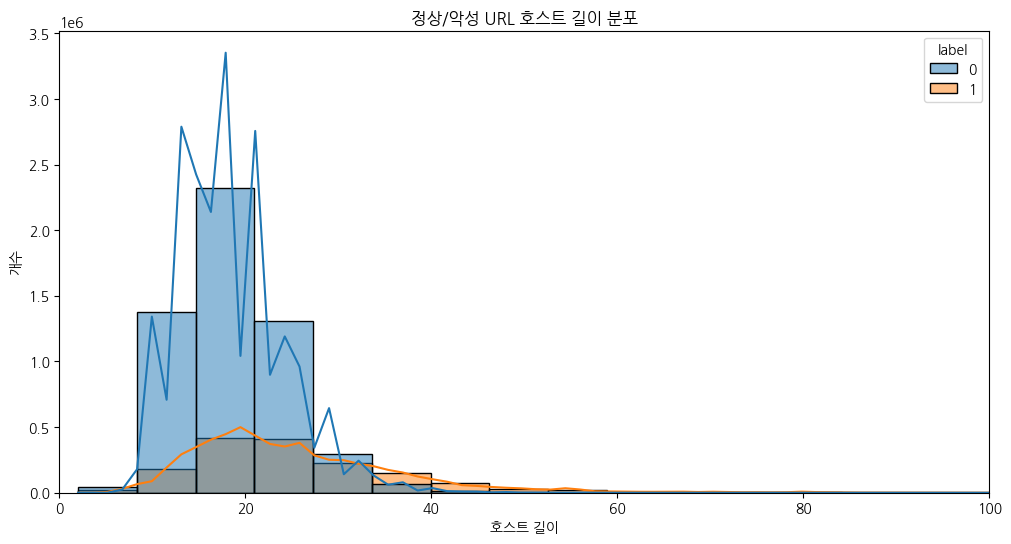

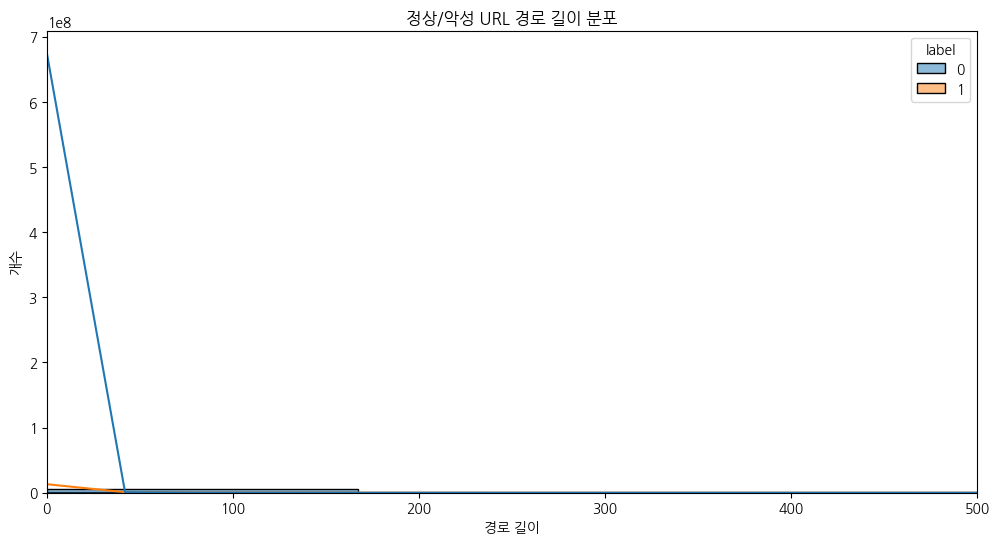

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 캐시 재생성
fm.fontManager.findfont('NanumGothic', rebuild_if_missing=True)

# 폰트 이름으로 폰트 경로를 찾음
font_name = fm.FontProperties(fname=fm.findfont('NanumGothic')).get_name()

# matplotlib의 기본 폰트를 나눔 고딕으로 설정
plt.rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

print("한글 폰트 설정이 완료되었습니다.")



# 호스트 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='host_length', hue='label', bins=50, kde=True)
plt.title('정상/악성 URL 호스트 길이 분포')
plt.xlabel('호스트 길이')
plt.ylabel('개수')
plt.xlim(0, 100) # x축 범위를 적절하게 설정
plt.show()

# 경로 길이 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='path_length', hue='label', bins=50, kde=True)
plt.title('정상/악성 URL 경로 길이 분포')
plt.xlabel('경로 길이')
plt.ylabel('개수')
plt.xlim(0, 500) # x축 범위를 적절하게 설정
plt.show()

추가 특성 탐색 (특징 공학)

In [14]:
import numpy as np
import re # 이 줄을 추가합니다.

# 특수 문자 개수를 세는 함수
def count_special_chars(url):
    return len(re.findall(r'[!@#$%^&*()_+\-=\[\]{};\':"\\|,.<>/?~`]', url))

# 하위 도메인 개수를 세는 함수
def count_subdomains(host):
    return len(host.split('.'))

# 'URL' 컬럼에 함수 적용
train_df['special_char_count'] = train_df['URL'].apply(count_special_chars)
train_df['subdomain_count'] = train_df['host'].apply(count_subdomains)

print(train_df[['URL', 'special_char_count', 'subdomain_count']].head())

                                     URL  special_char_count  subdomain_count
0               poznan[.]wuoz[.]gov[.]pl                   9                4
1              vill[.]okawa[.]kochi[.]jp                   9                4
2              nationalfinance[.]co[.]om                   6                3
3           town[.]ozora[.]hokkaido[.]jp                   9                4
4  open24[.]ie-news[.]irish/online/Login                   9                3


추가 특성 분석

In [15]:
# special_char_count와 subdomain_count가 정상/악성 URL에서 어떤 분포를 보이는지 분석

# 'special_char_count' 통계 분석
print("\n--- 특수 문자 개수 통계 ---")
print("정상 URL:\n", train_df[train_df['label'] == 0]['special_char_count'].describe())
print("\n악성 URL:\n", train_df[train_df['label'] == 1]['special_char_count'].describe())

# 'subdomain_count' 통계 분석
print("\n--- 하위 도메인 개수 통계 ---")
print("정상 URL:\n", train_df[train_df['label'] == 0]['subdomain_count'].describe())
print("\n악성 URL:\n", train_df[train_df['label'] == 1]['subdomain_count'].describe())



--- 특수 문자 개수 통계 ---
정상 URL:
 count    5.430159e+06
mean     4.658293e+00
std      2.571596e+00
min      0.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.290000e+02
Name: special_char_count, dtype: float64

악성 URL:
 count    1.564897e+06
mean     9.689580e+00
std      1.562064e+01
min      0.000000e+00
25%      6.000000e+00
50%      8.000000e+00
75%      1.100000e+01
max      8.208000e+03
Name: special_char_count, dtype: float64

--- 하위 도메인 개수 통계 ---
정상 URL:
 count    5.430159e+06
mean     2.302555e+00
std      5.462577e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      9.000000e+00
Name: subdomain_count, dtype: float64

악성 URL:
 count    1.564897e+06
mean     2.782789e+00
std      1.024970e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      4.000000e+01
Name: subdomain_count, dtype: float64


새로운 특징 시각화

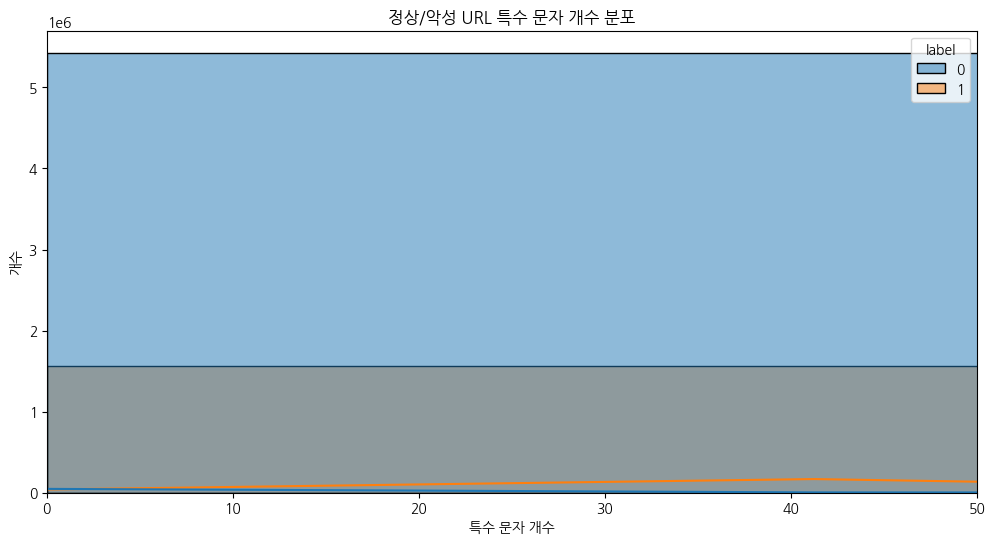

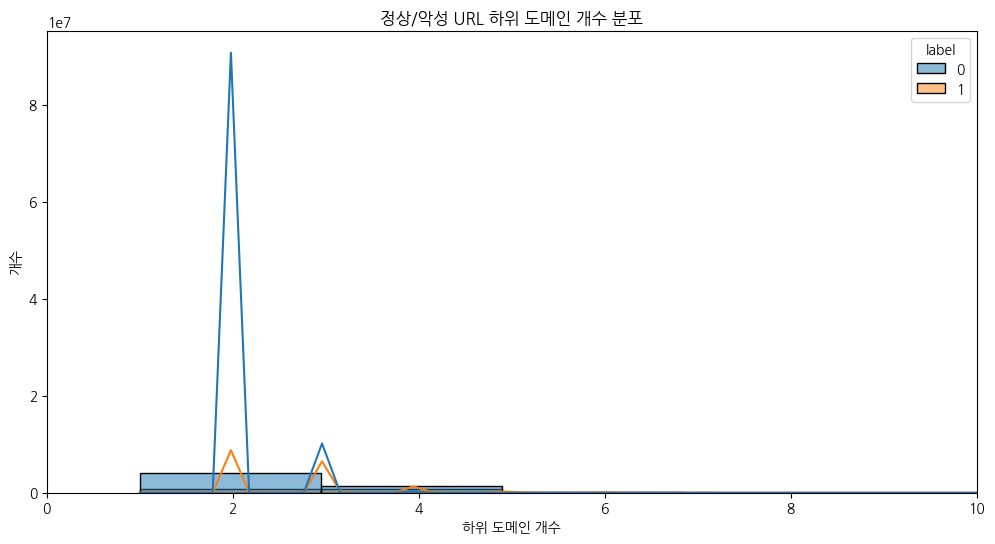

In [16]:
# special_char_count와 subdomain_count의 분포를 히스토그램으로 시각화

# 특수 문자 개수 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='special_char_count', hue='label', bins=50, kde=True)
plt.title('정상/악성 URL 특수 문자 개수 분포')
plt.xlabel('특수 문자 개수')
plt.ylabel('개수')
plt.xlim(0, 50) # x축 범위를 적절하게 설정
plt.show()

# 하위 도메인 개수 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='subdomain_count', hue='label', bins=20, kde=True)
plt.title('정상/악성 URL 하위 도메인 개수 분포')
plt.xlabel('하위 도메인 개수')
plt.ylabel('개수')
plt.xlim(0, 10) # x축 범위를 적절하게 설정
plt.show()

모든 특징의 상관관계 분석

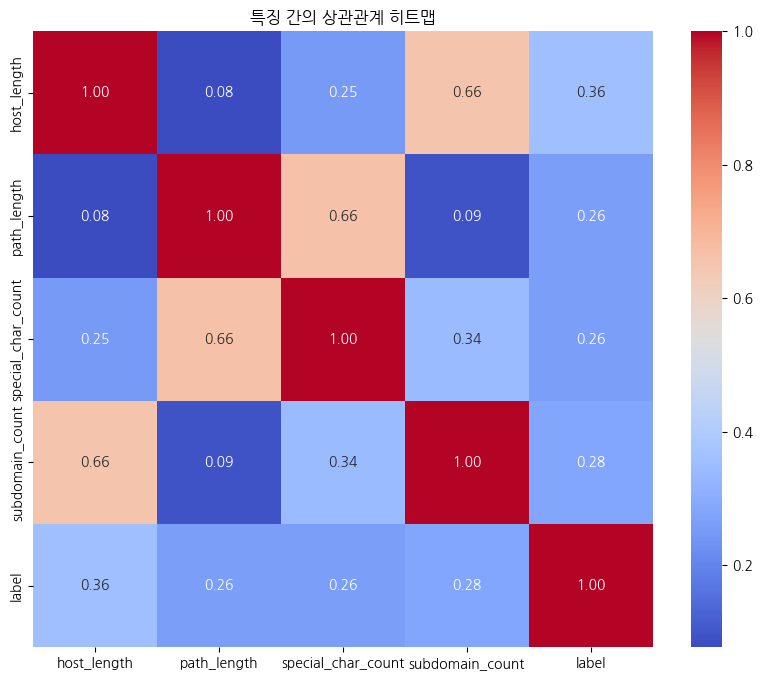

In [17]:
# 상관관계 행렬 계산
correlation_matrix = train_df[['host_length', 'path_length', 'special_char_count', 'subdomain_count', 'label']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('특징 간의 상관관계 히트맵')
plt.show()

데이터 불균형 확인 및 전처리

In [18]:
# 클래스 비율 확인
print("클래스(label) 비율:\n", train_df['label'].value_counts(normalize=True))

클래스(label) 비율:
 label
0    0.776285
1    0.223715
Name: proportion, dtype: float64


In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# 데이터 준비
# X는 특징(features), y는 정답(target)
X = train_df[['host_length', 'path_length', 'special_char_count', 'subdomain_count']]
y = train_df['label']

# 원래 클래스 분포 확인
print("원래 클래스 분포:", Counter(y))

# SMOTE를 데이터셋에 적용
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 재조정된 클래스 분포 확인
print("재조정된 클래스 분포:", Counter(y_res))

원래 클래스 분포: Counter({0: 5430159, 1: 1564897})
재조정된 클래스 분포: Counter({0: 5430159, 1: 5430159})
